In [215]:
import cv2
import json
import os
import mediapipe as mp
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [216]:
from tensorflow import keras
from tensorflow.keras import layers

In [217]:
df = pd.read_csv('dataset.csv', sep = ';')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435
0,1-1-1_1.jpg,0,0.311198,0.824786,-0.057646,0.255424,0.748718,-0.131635,0.292368,0.766410,...,-0.061451,0.417263,0.499597,-0.061451,0.395076,0.532980,-0.061451,0.430831,0.553444,-0.061451
1,1-1-1_2.jpg,0,0.308534,0.788322,-0.067089,0.263024,0.732800,-0.157865,0.297593,0.746331,...,-0.068214,0.514483,0.492823,-0.068214,0.482184,0.521814,-0.068214,0.519240,0.541850,-0.068214
2,1-1-1_3.jpg,0,0.317951,0.689929,-0.068517,0.287289,0.617760,-0.163948,0.301949,0.637594,...,-0.023734,0.467479,0.433310,-0.023734,0.429399,0.452148,-0.023734,0.458073,0.473545,-0.023734
3,1-1-1_4.jpg,0,0.382463,0.677630,-0.080503,0.386567,0.598269,-0.136269,0.389072,0.628328,...,0.001743,0.553131,0.470281,0.001743,0.527540,0.484448,0.001743,0.544089,0.505675,0.001743
4,1-1-1_5.jpg,0,0.578665,0.749811,-0.083235,0.536558,0.663449,-0.163760,0.546202,0.692338,...,0.011525,0.665321,0.493594,0.011525,0.638238,0.516101,0.011525,0.669009,0.536366,0.011525


In [218]:
df.shape

(591, 1436)

In [219]:
df['1'].value_counts()

1
0    433
1    158
Name: count, dtype: int64

In [220]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((478 * 3, )),
    tf.keras.layers.Dense(717, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(231, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [221]:
# Укажем конфигурацию обучения (оптимизатор, функция потерь, метрики)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Optimizer
              # Минимизируемая функция потерь
              loss=keras.losses.BinaryCrossentropy(),
              # Список метрик для мониторинга
              metrics=[keras.metrics.BinaryCrossentropy(), keras.metrics.BinaryAccuracy()]
              )

In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Program Files\Python311\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\pawls-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\pdfminer-20191125-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [222]:
x_train = np.asarray(df.drop(columns = ['0', '1']))
y_train = np.asarray(df.drop(columns = ['0'])['1']).reshape((-1,1))

In [223]:
x_train.shape, y_train.shape

((591, 1434), (591, 1))

In [224]:
%%time
history = model.fit(x_train, y_train, 
                    batch_size = 64,
                    epochs = 100
                    )

Epoch 1/100
10/10 [==============================] - 1s 16ms/step - loss: 0.6644 - binary_crossentropy: 0.6644 - binary_accuracy: 0.6650
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6027 - binary_crossentropy: 0.6027 - binary_accuracy: 0.7377
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5916 - binary_crossentropy: 0.5916 - binary_accuracy: 0.7242
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5744 - binary_crossentropy: 0.5744 - binary_accuracy: 0.7411
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5573 - binary_crossentropy: 0.5573 - binary_accuracy: 0.7377
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5614 - binary_crossentropy: 0.5614 - binary_accuracy: 0.7343
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5414 - binary_crossentropy: 0.5414 - binary_accuracy: 0.7445
Epoch 8/100
10/10 [======================

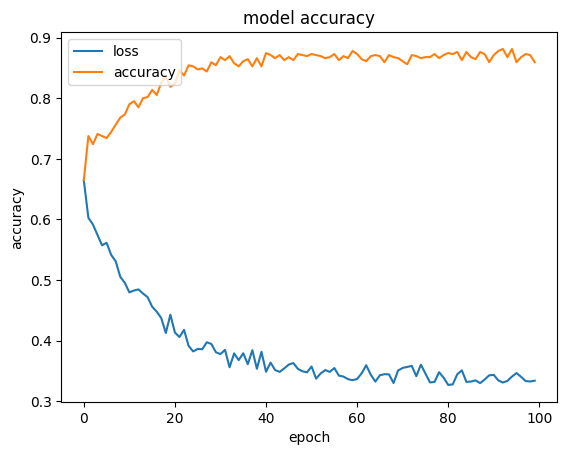

In [225]:
plt.plot(history.history['loss'])
plt.plot(history.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [226]:
# Calling `save('my_model.keras')` creates a zip archive `my_model.keras`.
model.save("my_model.keras")

In [227]:
# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model("my_model.keras")

In [228]:
model_predict = reconstructed_model.predict(x_train)

19/19 [==============================] - 0s 4ms/step


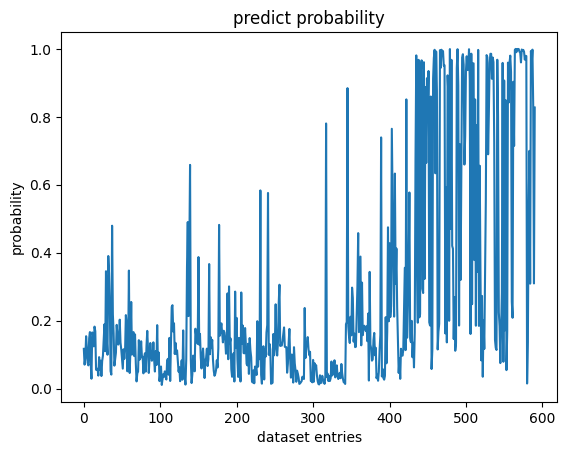

In [229]:
plt.plot(model_predict)
#plt.plot(history.history['accuracy'])
plt.title('predict probability')
plt.ylabel('probability')
plt.xlabel('dataset entries')
#plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [230]:
df['1'].value_counts()

1
0    433
1    158
Name: count, dtype: int64

In [231]:
arr1 = np.argwhere(model_predict <= 0.5)
arr1.shape

(480, 2)

In [232]:
c = 0
for i in range(arr1.shape[0]):
    pos = arr1[i, 0]
    if (pos > df['1'].value_counts()[0]):
        print(df.loc[pos][0])
        c+=1
print(c)

1597801_13.jpg
1597801_26.jpg
1597801_7.jpg
1673735382_pro-dachnikov-com-p-foto-za-partoi-v-univere-4_1.jpg
1673971580_pro-dachnikov-com-p-studenti-za-partami-foto-60_1.jpg
1673971580_pro-dachnikov-com-p-studenti-za-partami-foto-60_2.jpg
1673971580_pro-dachnikov-com-p-studenti-za-partami-foto-60_4.jpg
28_n1976129_big_20.jpg
28_n1976129_big_32.jpg
5a394610b890d909156903_11.jpg
5a394610b890d909156903_27.jpg
st (10)_7.jpg
st100_1.jpg
st101_2.jpg
st115_1.jpg
st118_1.jpg
st122_2.jpg
st124_2.jpg
st128_1.jpg
st129_1.jpg
st130_1.jpg
st132_1.jpg
st133_1.jpg
st133_3.jpg
st13_2.jpg
st13_4.jpg
st149_1.jpg
st150_2.jpg
st155_1.jpg
st158_1.jpg
st16_2.jpg
st19_6.jpg
st22_2.jpg
st22_4.jpg
st23_1.jpg
st24_1.jpg
st24_3.jpg
st25_5.jpg
st27_1.jpg
st31_1.jpg
st34_11.jpg
st35_1.jpg
st43_8.jpg
st48_2.jpg
st49_4.jpg
st4_15.jpg
st4_18.jpg
st4_28.jpg
st50_3.jpg
st58_1.jpg
st58_4.jpg
st65_2.jpg
st66_1.jpg
st90_1.jpg
st91_2.jpg
st93_2.jpg
st99_1.jpg
57


C:\Users\akhme\AppData\Local\Temp\ipykernel_10088\1296851241.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df.loc[pos][0])


In [233]:
from sklearn.metrics import classification_report

In [236]:
model_predict = reconstructed_model.predict(x_train)
#model_predict[0]
list1 = [l.tolist() for l in model_predict]
flat_list = [
    x
    for xs in list1
    for x in xs
]
mean = np.mean(flat_list)
print(mean)
flat_list01 = []
for i in flat_list:
    if i > 0.5:
        flat_list01.append(1)
    else:
        flat_list01.append(0)
flat_list01

19/19 [==============================] - 0s 4ms/step
0.27023056178793387


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [237]:
print(classification_report(list(df['1']),flat_list01))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       433
           1       0.90      0.63      0.74       158

    accuracy                           0.88       591
   macro avg       0.89      0.80      0.83       591
weighted avg       0.88      0.88      0.88       591



In [238]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2024-04-07


In [247]:
log_file_path = os.getcwd() + '\\logs\\' + str(date.today()) + '.csv'
log_file_path

'd:\\ML\\Attention-focus-detection-daniyar\\logs\\2024-04-07.csv'

In [243]:
os. getcwd()

'd:\\ML\\Attention-focus-detection-daniyar'

In [248]:
if not os.path.exists(log_file_path):
    with open(log_file_path, 'w') as myfile:
        myfile.write('attention detection service log\n')
c = 0